In [1]:
import rl_lib as RL
import numpy as np
import matplotlib.pyplot as plt

### LQR Problem
$$min\space\space \mathbb{E}_{x_0 \sim D}\left[\sum_{n=0}^{\infty}x_t^TQx_t+u_t^TRu_t\right]$$ 

$$s.t.$$
$$x_{t+1} = Ax_t + Bu_t, u_t = -Kx_t$$

In [2]:
numstep = 100
step_size = 0.005
thres = 1.0e-6
d = 3
k = 3
A = np.array([[1.01,0.01,0],[0.01,1.01,0.01],[0.0,0.01,1.01]])
B = np.eye(k)
Q = np.eye(d)
R = 2*np.eye(k)

solver = RL.LQR_Solver(A,B,Q,R,d,k,numstep,step_size,thres)

### Algebraic Riccati Equation (ARE)
$$P = A^TPA + Q - A^TPB(B^TPB+R)^{-1}B^TPA $$
$$K^* = - (B^TPB+R)^{-1}B^TPA $$

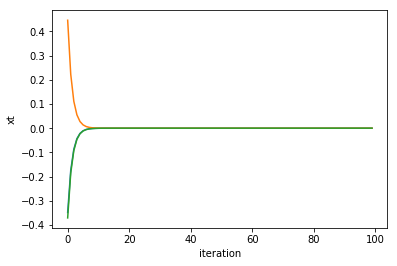

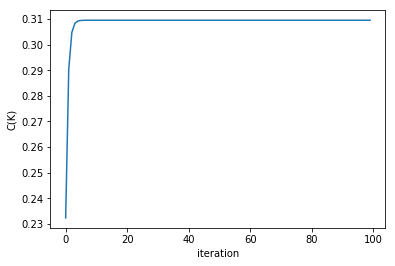

In [3]:
K_ARE = solver.ARE()
x_ARE, cost_ARE = solver.RollOut(K_ARE,numstep) 

# plot the state trajectories
t = [i for i in np.arange(0,numstep)]
f = plt.figure()
plt.xlabel("iteration")
plt.ylabel("xt")
for i in range(d):
    plt.plot(t,x_ARE[i,:])

# plot the incremental cost
f = plt.figure()
plt.xlabel("iteration")
plt.ylabel("C(K)")
plt.plot(t,cost_ARE)

### Model-based Policy Gradient method
$$C(K) = \mathbb{E}_{x_0 \sim D}\left[\sum_{n=0}^{\infty}x_t^TQx_t+u_t^TRu_t\right]$$
$$K_{n+1}=K_n - \eta\nabla C(K_n)$$

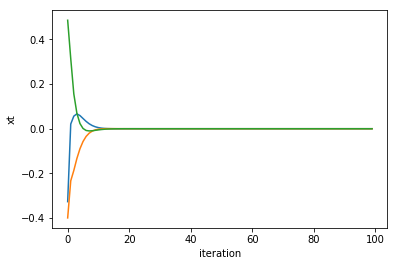

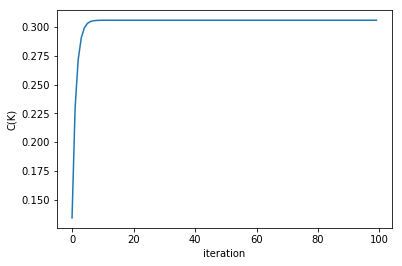

In [4]:
solver = RL.LQR_Solver(A,B,Q,R,d,k,numstep,step_size,thres)
K_PG = solver.ModelBased_PolicyGradient()

x_PG, cost_PG = solver.RollOut(K_PG,numstep)

# plot the trajectories
t_series = [i for i in np.arange(0,numstep)]
f = plt.figure()
plt.xlabel("iteration")
plt.ylabel("xt")
for i in range(d):
    plt.plot(t_series,x_PG[i,:])

# plot the incremental cost
f = plt.figure()
plt.xlabel("iteration")
plt.ylabel("C(K)")
plt.plot(t_series,cost_PG)

### Model-based Natural Policy Gradient method
$$K_{n+1}=K_n - \eta\nabla C(K_n)\Sigma_K^{-1}$$

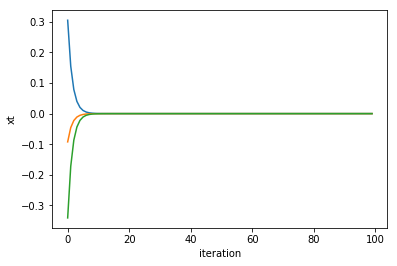

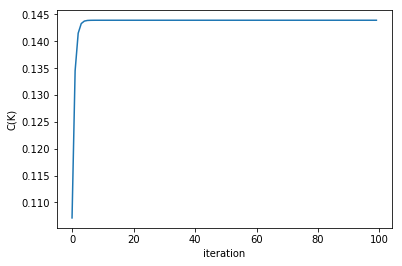

In [5]:
solver = RL.LQR_Solver(A,B,Q,R,d,k,numstep,step_size,thres)
K_NPG = solver.ModelBased_NaturalPolicyGradient()
x_NPG, cost_NPG = solver.RollOut(K_NPG,numstep) 
# plot the trajectories
t_series = [i for i in np.arange(0,numstep)]
f = plt.figure()
plt.xlabel("iteration")
plt.ylabel("xt")
for i in range(d):
    plt.plot(t_series,x_NPG[i,:])

# plot the cost of NPG
f = plt.figure()
plt.xlabel("iteration")
plt.ylabel("C(K)")
plt.plot(t_series,cost_NPG)

### Model-free Policy Gradient method
$$K_{n+1}=K_n - \eta\nabla \widehat{C(K_n)}$$
$$\widehat{C(K_n)} = \frac{1}{m}\sum_{m=0}^{m}\frac{d}{r^2}\widehat{C_i}U_i$$

[[0.68735963 0.62027447 0.95750017]
 [0.13342215 0.96305702 0.85905758]
 [0.13108504 0.45249091 0.89475921]]


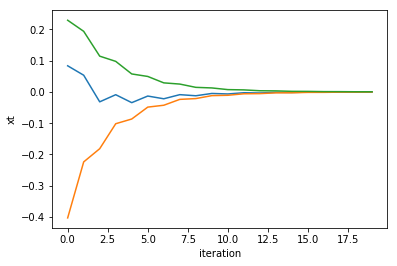

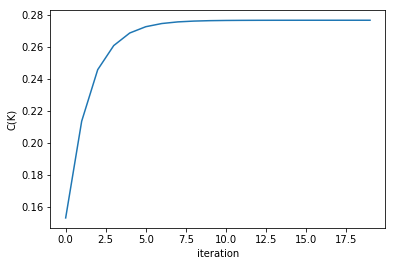

In [33]:
numstep =20
step_size = 0.00001
thres = 1.0e-4
d = 3
k = 3
A = np.array([[1.01,0.01,0],[0.01,1.01,0.01],[0.0,0.01,1.01]])
B = np.eye(k)
Q = np.eye(d)
R = 2*np.eye(k)

m=10 # number of trajectories
l=2 # trajectory length
r = 3 #smoothing parameter

solver = RL.LQR_Solver(A,B,Q,R,d,k,numstep,step_size,thres)
K_MPG = solver.ModelFree_PolicyGradient(m,l,r)
print(K_MPG)
x_MPG, cost_MPG = solver.RollOut(K_MPG,numstep) 
# plot the trajectories
t_series = [i for i in np.arange(0,numstep)]
f = plt.figure()
plt.xlabel("iteration")
plt.ylabel("xt")
for i in range(d):
    plt.plot(t_series,x_MPG[i,:])

# plot the cost of NPG
f = plt.figure()
plt.xlabel("iteration")
plt.ylabel("C(K)")
plt.plot(t_series,cost_MPG)